In [541]:
# risk calculation tool

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def attack(n_att, n_def):
    dice_att = sorted(roll_tha_dice(min(3, n_att)), reverse=True)
    dice_def = sorted(roll_tha_dice(min(2, n_def)), reverse=True) 
    
    dice_att = dice_att[0:min(2, n_def)] # get number of dice used for attacker
    dice_def = dice_def[0:min(2, n_att)] # get number of dice used for defender

    dice_diff = (np.array(dice_def) - np.array(dice_att)) >= 0 # defender wins
    
    n_att = n_att - sum(dice_diff) # update number of attackers/defenders
    n_def = n_def - (len(dice_diff) - sum(dice_diff))
        
    if n_att > 0 and n_def > 0: 
        n_att, n_def = attack(n_att, n_def)

    return (n_att, n_def)

def simulate_attack(n_att, n_def, iterations=5000):
    n_att_lst = []
    n_def_lst = []

    for i in range(0, iterations):
        n_att_, n_def_ = attack(n_att, n_def)
        n_att_lst.append(n_att_)
        n_def_lst.append(n_def_)

    # all iterations
    n_att = np.array(n_att_lst)
    n_def = np.array(n_def_lst)
    
    avg_att = n_att[n_att>0].mean()
    avg_def = n_def[n_def>0].mean()

    wins = sum(n_att>0)/iterations

    return (wins, avg_att, avg_def)

def roll_die():
    return (1 + np.random.randint(6))

def roll_tha_dice(n=1):
    if n<1: 
        return (-999)
    dice = []
    for i in range(0,n):
        dice.append(roll_die())
    return (dice)

def mod_df(df, grid):
    df.columns = grid
    df["defenders"] = grid
    df = df.set_index("defenders")
    df = round(df, 2)
    return(df)

In [520]:
# setting up a gridspace
from_ = 5
to_ = 30
n_ = 6

# initialization 
grid = np.linspace(from_, to_, n_).astype(int)
len_ = len(grid)
res_mat_wins = np.zeros((len_, len_))
res_mat_avg_att = np.zeros((len_, len_))
res_mat_avg_def = np.zeros((len_, len_))

# calculation
for i in range(0, len_):
    for j in range(0, len_):
        wins, avg_att, avg_def = simulate_attack(int(grid[i]),int(grid[j]), 3000)
        res_mat_wins[i,j] = wins
        res_mat_avg_att[i,j] = avg_att
        res_mat_avg_def[i,j] = avg_def
    
# post processing 
res_mat_wins = res_mat_wins.T
res_mat_avg_att = res_mat_avg_att.T
res_mat_avg_def = res_mat_avg_def.T

df_wins = pd.DataFrame(res_mat_wins)
df_wins = mod_df(df_wins, grid)
df_avg_att = pd.DataFrame(res_mat_avg_att)
df_avg_att = mod_df(df_avg_att, grid)
df_avg_def = pd.DataFrame(res_mat_avg_def)
df_avg_def = mod_df(df_avg_def, grid)

/home/pj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice.
/home/pj/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [555]:
simulate_attack(19, 20)

(0.5748, 6.422059846903271, 5.7572906867356535)

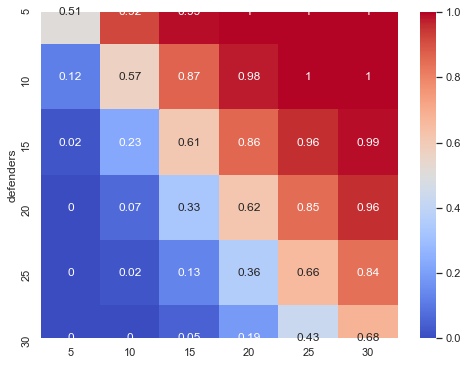

In [556]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df_wins, cmap='coolwarm', center = 0.5, annot = True)